# Dataset Analysis 2: Medical Insurance Costs

In [24]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
# Data Load
df = pd.read_csv('Datasets/insurance.csv')
print('Number of rows and columns in the dataset: ', df.shape)

Number of rows and columns in the dataset:  (1338, 7)


In [3]:
# Show column names
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
# Show the first few rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
# Remove duplicates if any
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [18]:
# The info() method to show the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [10]:
# The describe() method to calculate some basic satistical data in the dataframe
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
# .isnull().sum() returns the number of missing values in the dataset.
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Text(0.5, 1.0, 'Missing values in the dataset')

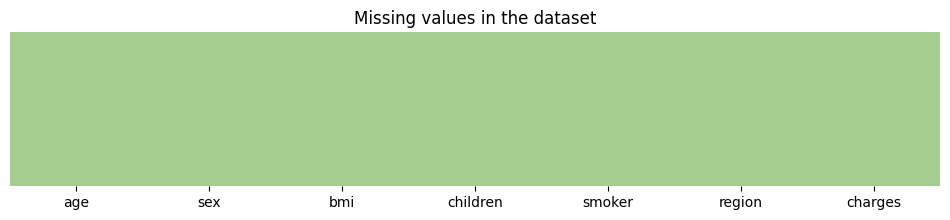

In [23]:
# (Optional) Show a heatmap of the missing values
plt.figure(figsize=(12,2))
sns.heatmap(df.isnull(), cbar=False, cmap='crest', yticklabels=False)
plt.title('Missing values in the dataset')

## Exploratory Data Analysis

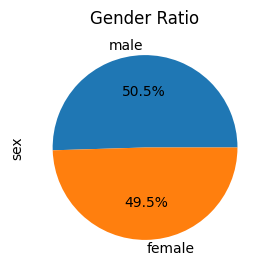

In [22]:
# Gender ratio pie chart using matplotlib
plt.figure(figsize=(3, 3))
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Ratio')
plt.show()

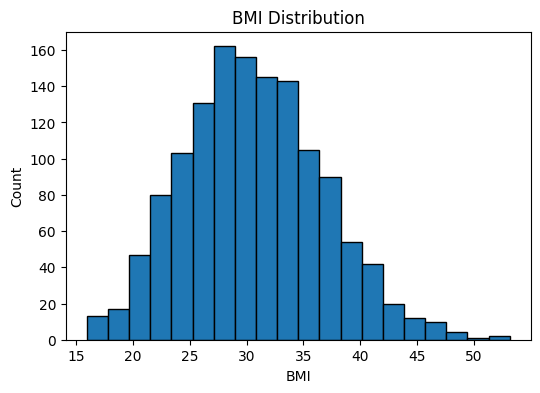

In [24]:
# Matplotlib BMI distribution
plt.figure(figsize=(6, 4))
plt.hist(df['bmi'], bins=20, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('BMI Distribution')
plt.show()

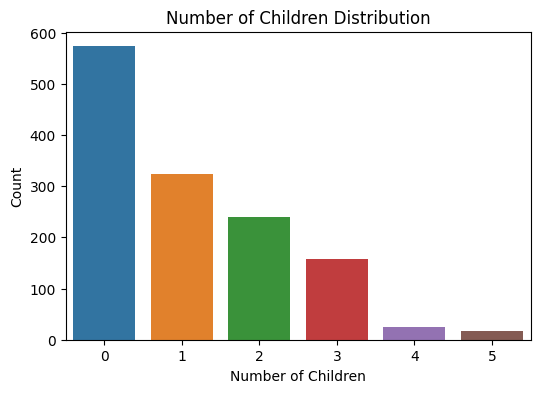

In [25]:
# Matplotlib children distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Number of Children Distribution')
plt.show()

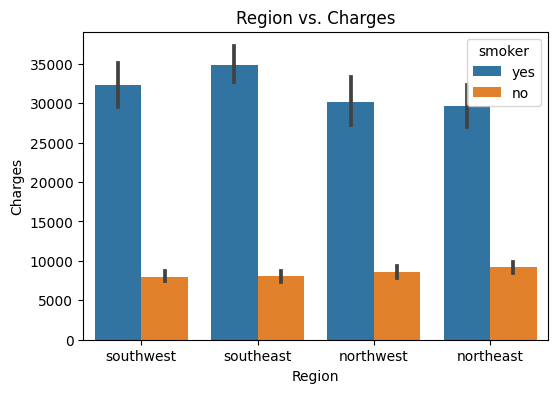

In [26]:
# Matplotlib+Seaborn region vs charges for smokers/non-smokers
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='region', y='charges', hue='smoker')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs. Charges')
plt.show()

<Axes: >

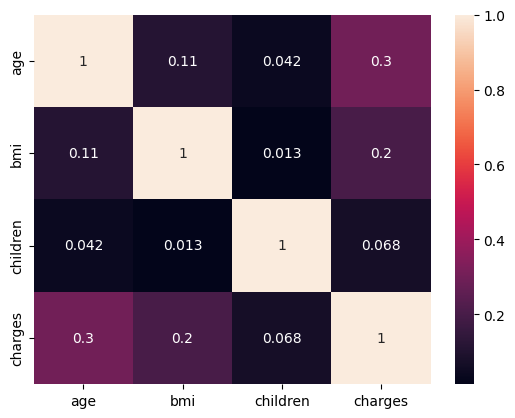

In [44]:
# Pandas DataFrame corr() Method: Correlation plot with Seaborn heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True)

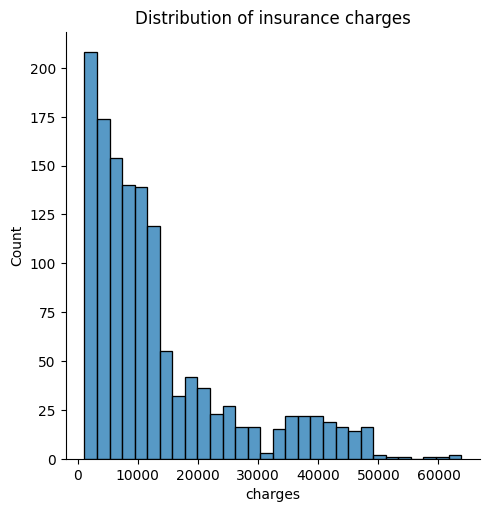

In [62]:
# displot to show the total counts of insurance charges
sns.displot(df['charges']).set(title='Distribution of insurance charges')

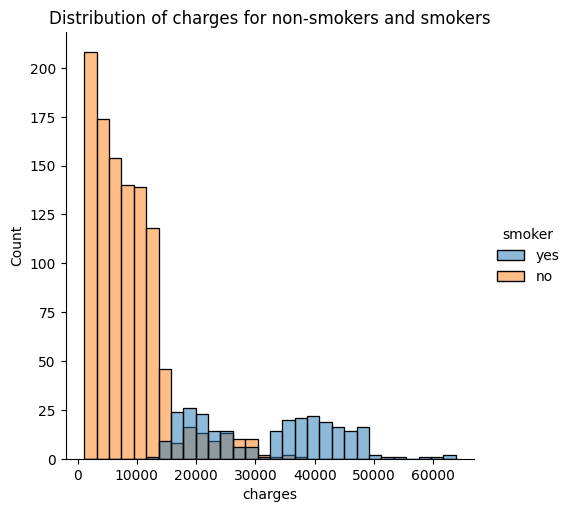

In [109]:
# displot to show the differences of distribution charges between smokers and non-smokers
a = sns.displot(data=df, x='charges', hue='smoker')
a.set(title='Distribution of charges for non-smokers and smokers')

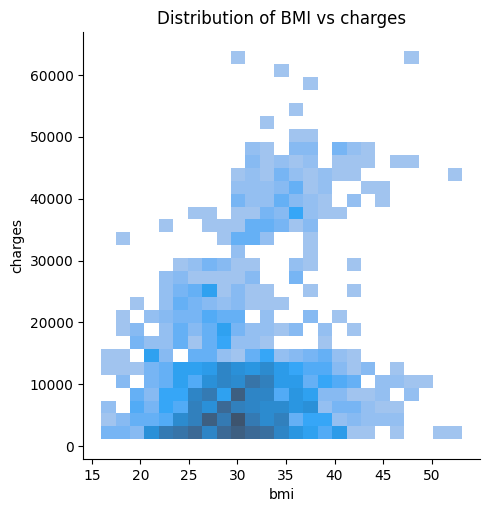

In [160]:
# displot for distribution of BMI vs charges
sns.displot(data=df, x='bmi', y='charges').set(title='Distribution of BMI vs charges')

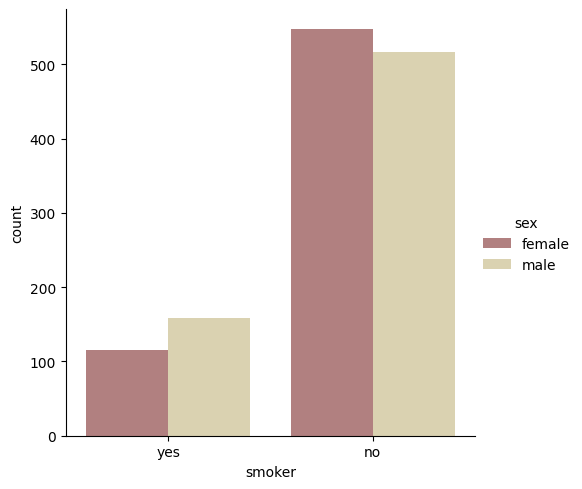

In [111]:
# catplot (categorical plot) of non-smoking and smoking genders
sns.catplot(data=df, x="smoker", kind="count", hue='sex', palette="pink")

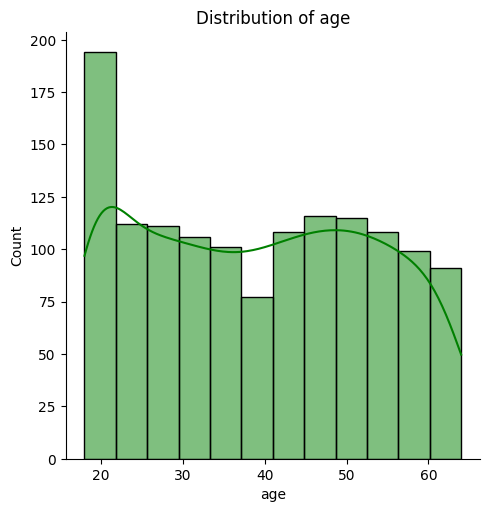

In [118]:
# displot to show the distribution of ages
sns.displot(df['age'], color='green', kde=True).set(title='Distribution of age')

[Text(0.5, 1.0, 'Scatterplot of age vs charges')]

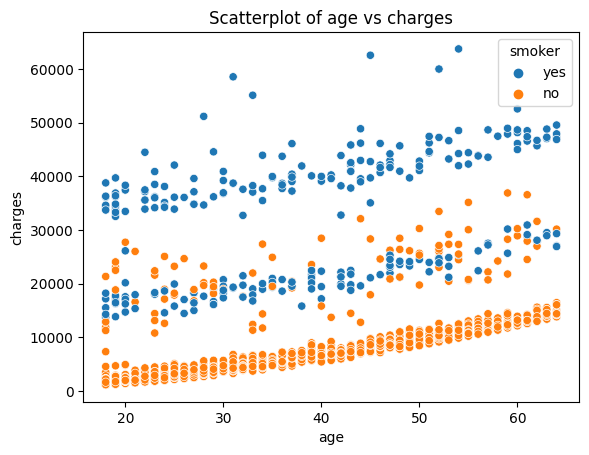

In [144]:
# scatterplot of age vs charges
sns.scatterplot(data=df, x='age', y='charges', hue='smoker').set(title='Scatterplot of age vs charges')

[Text(0.5, 1.0, 'Scatterplot of BMI vs charges')]

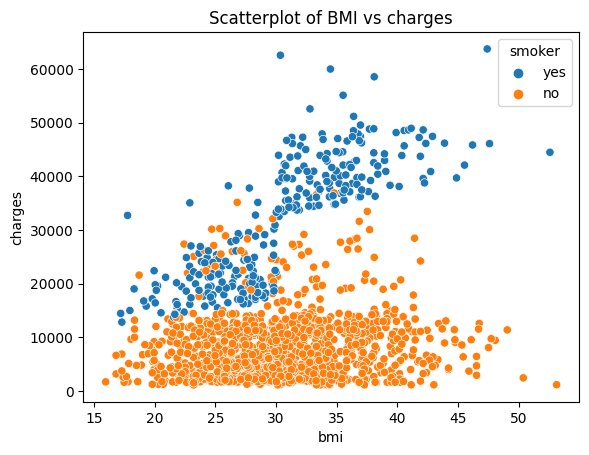

In [143]:
# scatterplot of BMI vs charges
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker').set(title='Scatterplot of BMI vs charges')

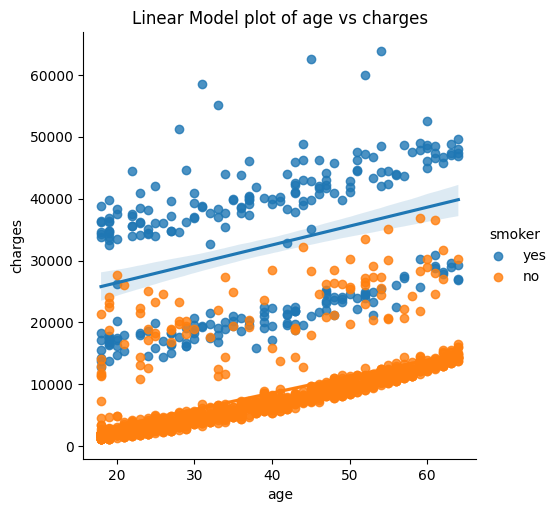

In [161]:
# linear model plot for age vs charges
sns.lmplot(data=df, x='age',y='charges', hue='smoker').set(title='Linear Model plot of age vs charges')

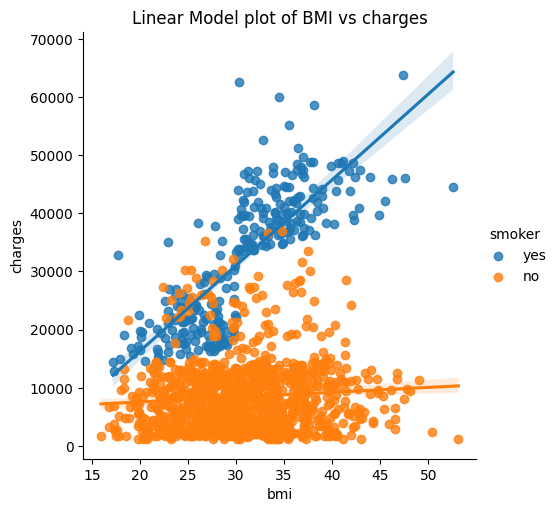

In [162]:
# linear model plot for BMI vs charges
sns.lmplot(data=df, x='bmi', y='charges', hue='smoker').set(title='Linear Model plot of BMI vs charges')

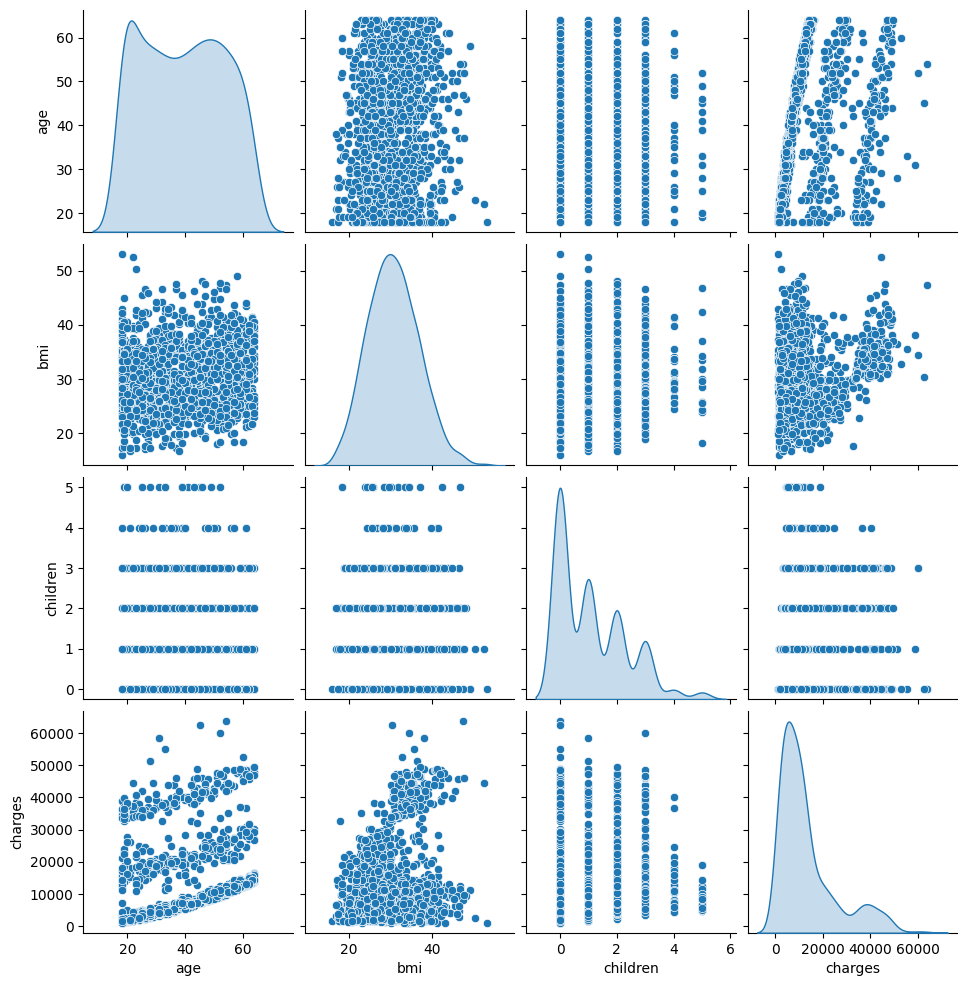

In [29]:
# pairplot for the dataframe
sns.pairplot(df, diag_kind='kde')

___
## `Data Preprocessing`
* `Data splitting goes before categorical encoding`

In [26]:
# Import sklearn libraries
# pip install xgboost
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder

In [28]:
# Remove rows with missing target, separate target from predictors
df.dropna(axis=0)
X = df.drop('charges', axis = 1)
y = df['charges']

# Drop columns with missing values
cols_with_missing = [col for col in X.columns if X[col].isnull().any()] 
X.drop(cols_with_missing, axis=1, inplace=True)
X_test.drop(cols_with_missing, axis=1, inplace=True)

# Data Split: Train-Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.head()

,age,sex,bmi,children,smoker,region
1163,18,female,28.215,0,no,northeast
196,39,female,32.800,0,no,southwest
438,52,female,46.750,5,no,southeast
183,44,female,26.410,0,no,northwest
1298,33,male,27.455,2,no,northwest


In [29]:
# Categorical columns (variables) in the training data
oc = [col for col in X_train.columns if X_train[col].dtype == "object"]
#object_cols = (X_train.dtypes == 'object')
print('Categorical columns:', oc)

Categorical columns: ['sex', 'smoker', 'region']


In [30]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[oc]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[oc]))

# One-hot encoding replaced index
OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index

# Remove categorical columns to replace with one-hot encoding
num_X_train = X_train.drop(oc, axis=1)
num_X_test = X_test.drop(oc, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

# Ensure all columns have string type
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_test.columns = OH_X_test.columns.astype(str)

#print("MAE (One-Hot Encoding):") 
#print(scores(OH_X_train, OH_X_valid, y_train, y_test))

___
## Notes
* The lower the MAE value, the more accurate the model is.
* The lower the MSE value, the more accurate the model is
* A R2 of 1 indicates that the regression predictions perfectly fit the data.

___
## Linear Regression


In [60]:
# Model Training
lm = LinearRegression()
lm.fit(OH_X_train, y_train)

LinearRegression()

In [61]:
# Prediction & Evaluation
pred = lm.predict(OH_X_test)
print('LR MAE:', metrics.mean_absolute_error(y_test, pred))
print('LR MSE:', metrics.mean_squared_error(y_test, pred))
print('LR RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('LR R2 Score:', lm.score(OH_X_test,y_test))

LR MAE: 4011.449679327984
LR MSE: 33342497.826954577
LR RMSE: 5774.296305780867
LR R2 Score: 0.7909160991789905


___
## Decision Tree Regressor

In [157]:
# Model Training
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(OH_X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [161]:
# Prediction & Evaluation
pred = dtr.predict(OH_X_test)
print('DTR MAE:', metrics.mean_absolute_error(y_test, pred))
print('DTR MSE:', metrics.mean_squared_error(y_test, pred))
print('DTR RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('DTR R2 Score:', dtr.score(OH_X_test,y_test))

DTR MAE: 3250.7219471990047
DTR MSE: 47104303.64164846
DTR RMSE: 6863.257509495652
DTR R2 Score: 0.7046186640854704


___
## Random Forest Regressor

In [162]:
# Model Training
rfr = RandomForestRegressor(random_state=0)
rfr.fit(OH_X_train, y_train)

RandomForestRegressor(random_state=0)

In [164]:
# Prediction & Evaluation
pred = rfr.predict(OH_X_test)
print('RFR MAE:', metrics.mean_absolute_error(y_test, pred))
print('RFR MSE:', metrics.mean_squared_error(y_test, pred))
print('RFR RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('RFR R2 Score:', rfr.score(OH_X_test,y_test))

RFR MAE: 2813.066872270668
RFR MSE: 22424759.946957953
RFR RMSE: 4735.4788508616475
RFR R2 Score: 0.859378973074587


___
## Gradient Boosting Regressor

In [31]:
# Model Training
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(OH_X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [40]:
# Prediction & Evaluation
gbrp = gbr.predict(OH_X_test)
print('GBR MAE:', metrics.mean_absolute_error(y_test, gbrp))
print('GBR MSE:', metrics.mean_squared_error(y_test, gbrp))
print('GBR RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbrp)))
print('GBR R2 Score:', gbr.score(OH_X_test,y_test))

GBR MAE: 2510.067973018198
GBR MSE: 17869560.111220915
GBR RMSE: 4227.240247634491
GBR R2 Score: 0.8879436881603647


___
## Conclusion

This analysis portraits the potential of machine learning techniques in predicting medical insurance costs and correlation between different features. 

Four machine learning models were compared:
* Linear Regression
* Decision Tree Regressor
* Random Forest Regressor
* Gradient Boosting Regressor 

The gradient boosting regressor performed best with the highest R2 score of 0.888.

___

## Data preprocessing with pandas.get_dummies()

Important Notes:
* Categorical encoding was carried out prior to data splitting in this case. The usual opposite way failed to function due to: ValueError: could not convert string to float: 'female'.
* pandas.get_dummies resulted comparatively with One Hot encoding in this case.

In [8]:
# To identify categorical variables
object_cols = [col for col in df if df[col].dtypes=='object']
print('Categorical columns:', object_cols)

Categorical columns: ['sex', 'smoker', 'region']


In [17]:
# To replace categorical variables with indicator variable
dfd = pd.get_dummies(df, columns=object_cols, drop_first=True)
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   uint8  
 5   smoker_yes        1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 48.5 KB


In [18]:
# Remove rows with missing target, separate target from predictors
dfd.dropna(axis=0)
X = dfd.drop('charges', axis = 1)
y = dfd['charges']

# Drop columns with missing values
cols_with_missing = [col for col in X.columns if X[col].isnull().any()] 
X.drop(cols_with_missing, axis=1, inplace=True)
#X_test.drop(cols_with_missing, axis=1, inplace=True)

# Data Split: Train-Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1163,18,28.215,0,0,0,0,0,0
196,39,32.800,0,0,0,0,0,1
438,52,46.750,5,0,0,0,1,0
183,44,26.410,0,0,0,1,0,0
1298,33,27.455,2,1,0,1,0,0


In [20]:
# LR Model Training
lm = LinearRegression()
lm.fit(X_train, y_train)

# Prediction & Evaluation
pred = lm.predict(X_test)
print('LR MAE:', metrics.mean_absolute_error(y_test, pred))
print('LR MSE:', metrics.mean_squared_error(y_test, pred))
print('LR RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('LR R2 Score:', lm.score(X_test,y_test))

LR MAE: 4011.4496793279873
LR MSE: 33342497.82695458
LR RMSE: 5774.296305780868
LR R2 Score: 0.7909160991789904


In [22]:
# DTR Model Training
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)

# Prediction & Evaluation
pred = dtr.predict(X_test)
print('DTR MAE:', metrics.mean_absolute_error(y_test, pred))
print('DTR MSE:', metrics.mean_squared_error(y_test, pred))
print('DTR RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('DTR R2 Score:', dtr.score(X_test,y_test))

DTR MAE: 3325.9151164029854
DTR MSE: 48791466.22062715
DTR RMSE: 6985.088848441883
DTR R2 Score: 0.6940388168537814


In [23]:
# RFR Model Training
rfr = RandomForestRegressor(random_state=0)
rfr.fit(X_train, y_train)

# Prediction & Evaluation
pred = rfr.predict(X_test)
print('RFR MAE:', metrics.mean_absolute_error(y_test, pred))
print('RFR MSE:', metrics.mean_squared_error(y_test, pred))
print('RFR RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('RFR R2 Score:', rfr.score(X_test,y_test))

RFR MAE: 2794.949689545937
RFR MSE: 22612441.641548622
RFR RMSE: 4755.254109040717
RFR R2 Score: 0.8582020600244198


In [21]:
# GBR Model Training
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)

# Prediction & Evaluation
pred = gbr.predict(X_test)
print('GBR MAE:', metrics.mean_absolute_error(y_test, pred))
print('GBR MSE:', metrics.mean_squared_error(y_test, pred))
print('GBR RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('GBR R2 Score:', gbr.score(X_test,y_test))

GBR MAE: 2534.6011649075485
GBR MSE: 18227368.60393946
GBR RMSE: 4269.352246411563
GBR R2 Score: 0.885699945181277
